In [1]:

import networkx as nx
import numpy as np
import random, math

import time


import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm



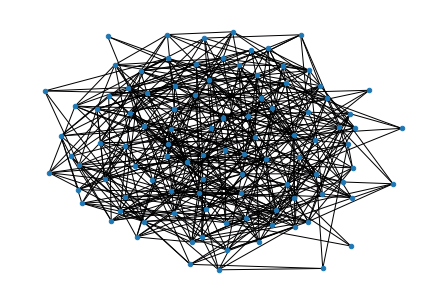

In [66]:

n = 100

G = nx.erdos_renyi_graph(n, 0.1)
initial_nodes = list(G.nodes())

#G.add_node(22)
nx.draw_kamada_kawai(G, with_labels = False, node_size = 20)


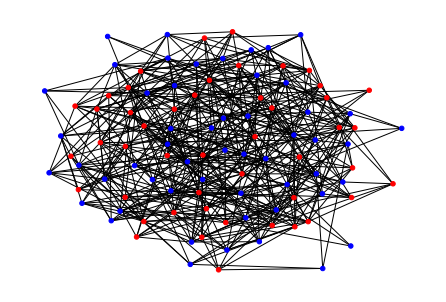

In [67]:

SES_list = np.random.choice(['High', 'Low'], n, p=[0.5,0.5])
nodes = [i for i in range(n)]
SES_dict = {node: {'SES': SES_list[node]} for node in nodes}


nx.set_node_attributes(G, SES_dict)


colormap = ['blue' if SES == 'High' else 'red' for SES in SES_list]
nx.draw_kamada_kawai(G, node_color = colormap, node_size = 20)



In [55]:

def get_select_node_attributes(graph, attribute, node_list):
    attribute_dict_all_nodes = nx.get_node_attributes(graph, attribute)
    attribute_dict = {node: attribute_dict_all_nodes[node] for node in node_list}

    return attribute_dict

node_list = [15,27]

get_select_node_attributes(G, 'SES', node_list)

def SES_link_classifier(graph, node1, node2):    
    SES_values = list(get_select_node_attributes(graph, 'SES', [node1, node2]).values())
    link_type = 'within' if SES_values[0] == SES_values[1] else 'cross'

    return link_type


SES_link_classifier(G, 19, 29)


'cross'

In [30]:

print(list(nx.neighbors(G, 19)))
print(get_select_node_attributes(G, 'SES', [19,1,6,26,28]))



[1, 6, 26, 28, 39, 41, 75, 82, 96, 99]
{19: 'High', 1: 'Low', 6: 'Low', 26: 'Low', 28: 'High'}


In [94]:

edge_types = [SES_link_classifier(G, edge[0], edge[1]) for edge in G.edges]

x = np.asarray(np.unique(edge_types, return_counts=True)).T

xlist = list(map(tuple, x))
xdict = {i[0]: int(i[1]) for i in xlist}

edges_type_dict = {list(G.edges)[i]: edge_types[i] for i in range(len(G.edges))}

x


array([['cross', '284'],
       ['within', '224']], dtype='<U21')